In [1]:
import pandas as pd
DT = pd.read_excel('Data_train.xlsx')
DT.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [2]:
DT.shape

(6019, 12)

In [3]:
DT.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


**Minimun number of seats is ZERO which not possible in any type of car**

In [4]:
DT.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
#Converting the data type of required coloumns into float type for further calculation
import numpy as np
#power
DT.loc[DT.Power=='null bhp','Power'] = np.nan
DT[DT.Power =='null bhp'].Power.head(3)

DT['Power'] = DT.Power.str.replace('bhp','')
#DT.head()
DT['Power']= DT.Power.astype(float)

#Engine
DT['Engine'] = DT.Engine.str.replace('CC','')
#DT.head(2)
DT['Engine']  = DT.Engine.astype(float)
#DT.dtypes

#mileage
mileage = DT.Mileage.str.replace('km/kg','kmpl')
DT['Mileage'] = mileage
milg = DT.Mileage.str.replace('kmpl','')
DT['Mileage'] = milg
#DT.head(2)

DT['Mileage'] = DT.Mileage.astype(float)

DT.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [6]:
 DT.head(4)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00


In [7]:
#Finding the mean of coloums having 'NUll' or 'NaN' values
print('meanEngine = ',DT.Engine.mean())
print('meanPower = ',DT.Power.mean())
print('meanMileage = ',DT.Mileage.mean())
print('meanSeats= ',DT.Seats.mean())

meanEngine =  1621.276449941501
meanPower =  113.25304969366915
meanMileage =  18.134960943992024
meanSeats=  5.278735151413753


In [8]:
#filling the 'Null' or "NaN" having coloumns by that particular coloumn's mean value
DT['Engine'].fillna(value = 1621.27644,inplace =True)
DT['Power'].fillna(value =  113.2530,inplace =True)
DT['Mileage'].fillna(value = 18.13496,inplace =True)
DT['Seats'].fillna(value = 6,inplace =True)

#Checking if there is any null values left to fill
DT.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [9]:
#Checking the channges in the mean value of columns after filling the 'NaN' values
print('meanEngine = ',DT.Engine.mean())
print('meanPower = ',DT.Power.mean())
print('meanMileage = ',DT.Mileage.mean())
print('meanSeats= ',DT.Seats.mean())

meanEngine =  1621.27644988204
meanPower =  113.25304851304202
meanMileage =  18.13496094367835
meanSeats=  5.2837680677853465


In [10]:
#Dat = DT[DT.Year ==1998]
#Dat

In [11]:
#checking for duplicate rows
DT.duplicated().sum()

0

In [12]:
#Storing the index values of rows for those coloumns having '0' values
zero_val_milg = DT[DT.Mileage==0].index.tolist()
zero_val_pow = DT[DT.Power==0].index.tolist()
zero_val_seat =DT[DT.Seats==0].index.tolist()
zero_val_eng = DT[DT.Engine==0].index.tolist()

In [13]:
#Droping the rows that have '0's' in obivious coloumns
DT.drop(labels =zero_val_milg ,inplace =True)
#DT.drop(labels =zero_val_pow ,inplace =True)
DT.drop(labels =zero_val_seat ,inplace =True)
DT.drop(labels =zero_val_eng ,inplace =True)

In [14]:
DT.shape

(5950, 12)

In [15]:
DT.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5950.000000,5.950000e+03,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,2013.406555,5.856363e+04,18.343501,1619.695615,113.120496,5.284706,9.456319
std,3.220781,9.165973e+04,4.173887,597.264498,53.341649,0.804646,11.138390
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.390450e+04,15.300000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.297725e+04,21.100000,1968.000000,138.030000,5.000000,9.915000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


**NOTE :- Mininum  number of seats are not zero can be see from above aggregation** 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Detecting outliers using graphical methods**

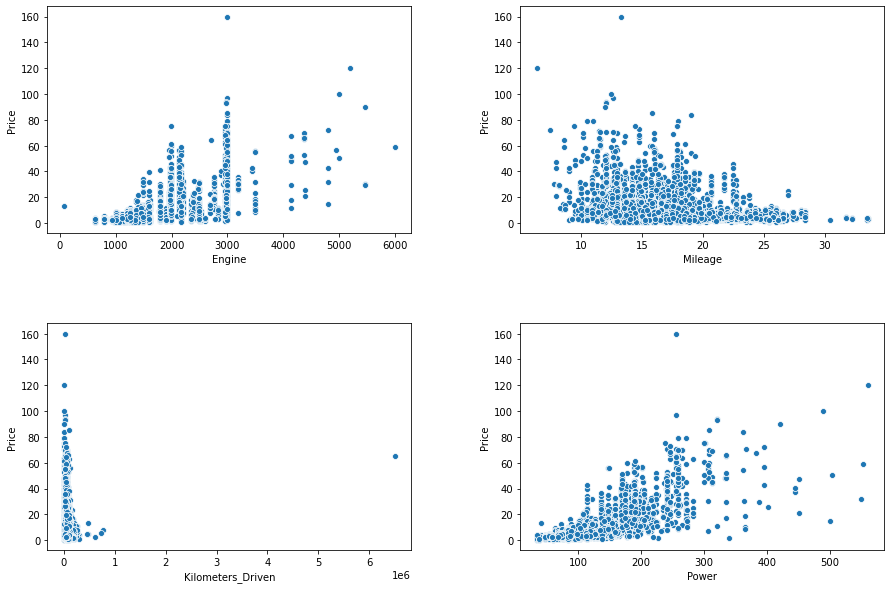

In [17]:
fig = plt.figure(figsize = (15,10))

fig.subplots_adjust(hspace = 0.4, wspace =0.3)
plt.subplot(2,2,1)
sns.scatterplot(x = 'Engine',y = 'Price',data = DT)

plt.subplot(2,2,2)
sns.scatterplot(x = 'Mileage',y = 'Price',data = DT)

plt.subplot(2,2,3)
sns.scatterplot(x = 'Kilometers_Driven',y = 'Price',data = DT)

plt.subplot(2,2,4)
sns.scatterplot(x = 'Power',y = 'Price',data = DT)

plt.show()

In [18]:
#Droping one row because Kilometer_driven have one outlier
kdriven = DT[DT.Kilometers_Driven>1000000].index.tolist()
DT.drop(labels = kdriven ,inplace =True)
DT.shape

(5949, 12)

**We can see that there are no siginificant outliers in the datasheet to remove therefore we'll ingonre them.**

# Exploratory Analysis of our datasheet : -

**Imputing a New coloumn derived from 'Name' coloumn in the datasheet**

In [19]:
#Brand is the new coloumn containing only the Brand Name of cars#
DT['Brand'] = DT.Name.str.split().str.get(0)
DT.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


**Finding the relation between 'Price' and the independent variables.**

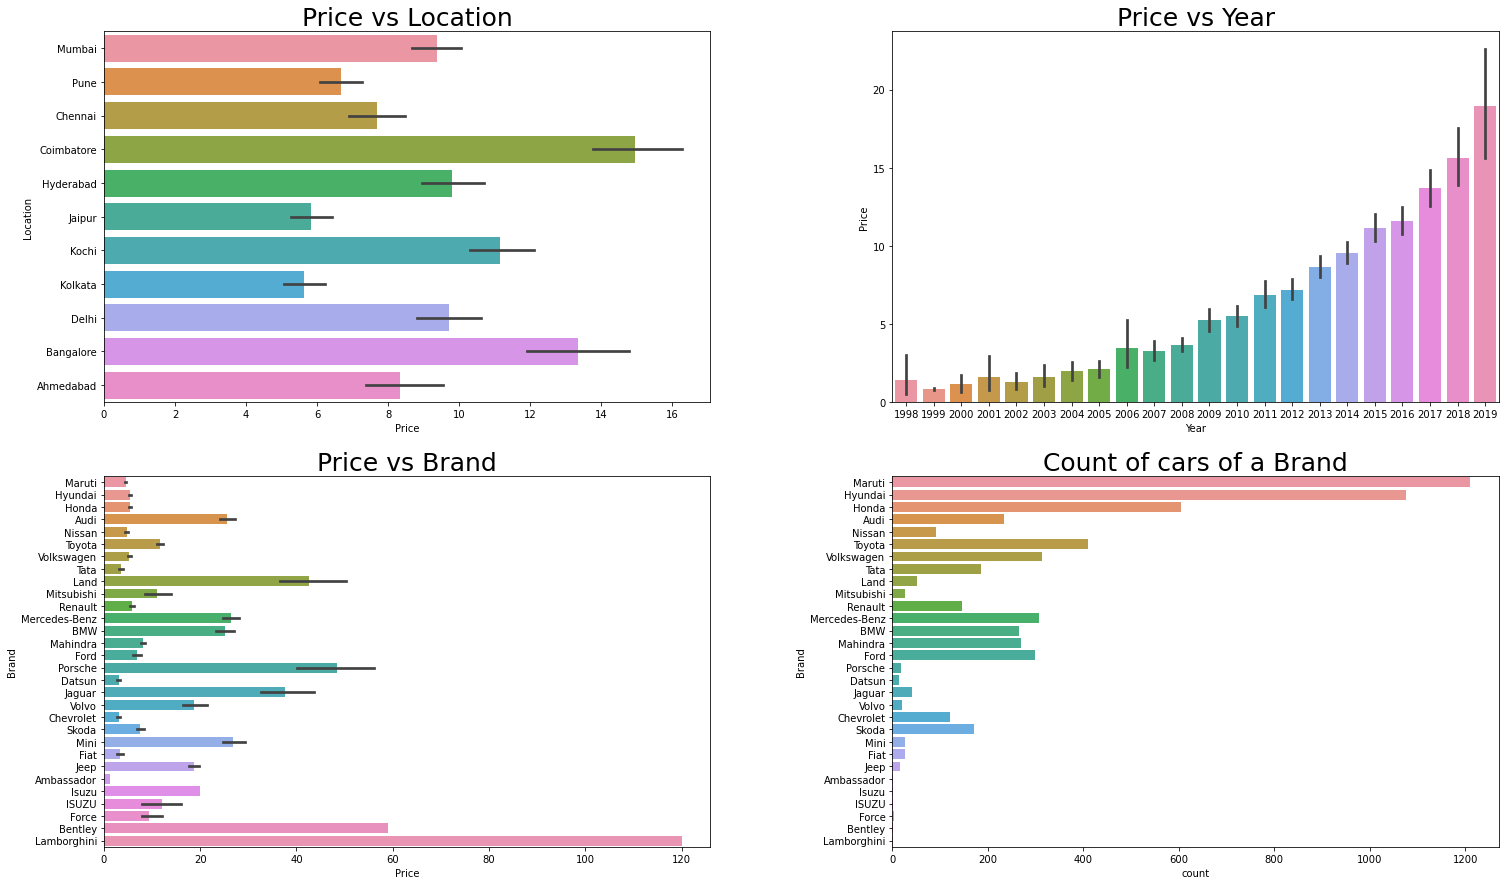

In [20]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)
#Relation between Price and location
sns.barplot(x = 'Price', y ='Location', data  = DT)
plt.title('Price vs Location',fontsize  =25)

#Relation between Price and year
plt.subplot(2,2,2)
sns.barplot(x ='Year', y ='Price', data  = DT)
plt.title('Price vs Year',fontsize  =25)

#Relation between Price and Brand
plt.subplot(2,2,3)
sns.barplot(x = 'Price', y ='Brand', data  = DT)
plt.title('Price vs Brand',fontsize  =25)

#Counting the which brand have most number of cars in our datasheet 
plt.subplot(2,2,4)
sns.countplot(y ='Brand', data  = DT)
plt.title('Count of cars of a Brand',fontsize  =25)

plt.show()

**INFERENCE :-**

1.Price of cars are highest in **Hyderabad** and **Banglore** while lowest in **Jaipur** and **kochi**.

2.The Price of cars increases gradually year by year except the price drops slightly in year **2007**

3.The Highest price of car is **Lamborghini** and lowest price of car is **Maruti** and thus the highest number of cars owned by people is of brand **Maruti** and hardly two car is owned of brand **lamborghini** by people.

4.While **Mercedenz-Benz** and **BMW** cars are owned by moderate amount of people despite of their high prices.

**NOTE :-** We can say that the lesser the price of a car then it is more likely to be bought by people.

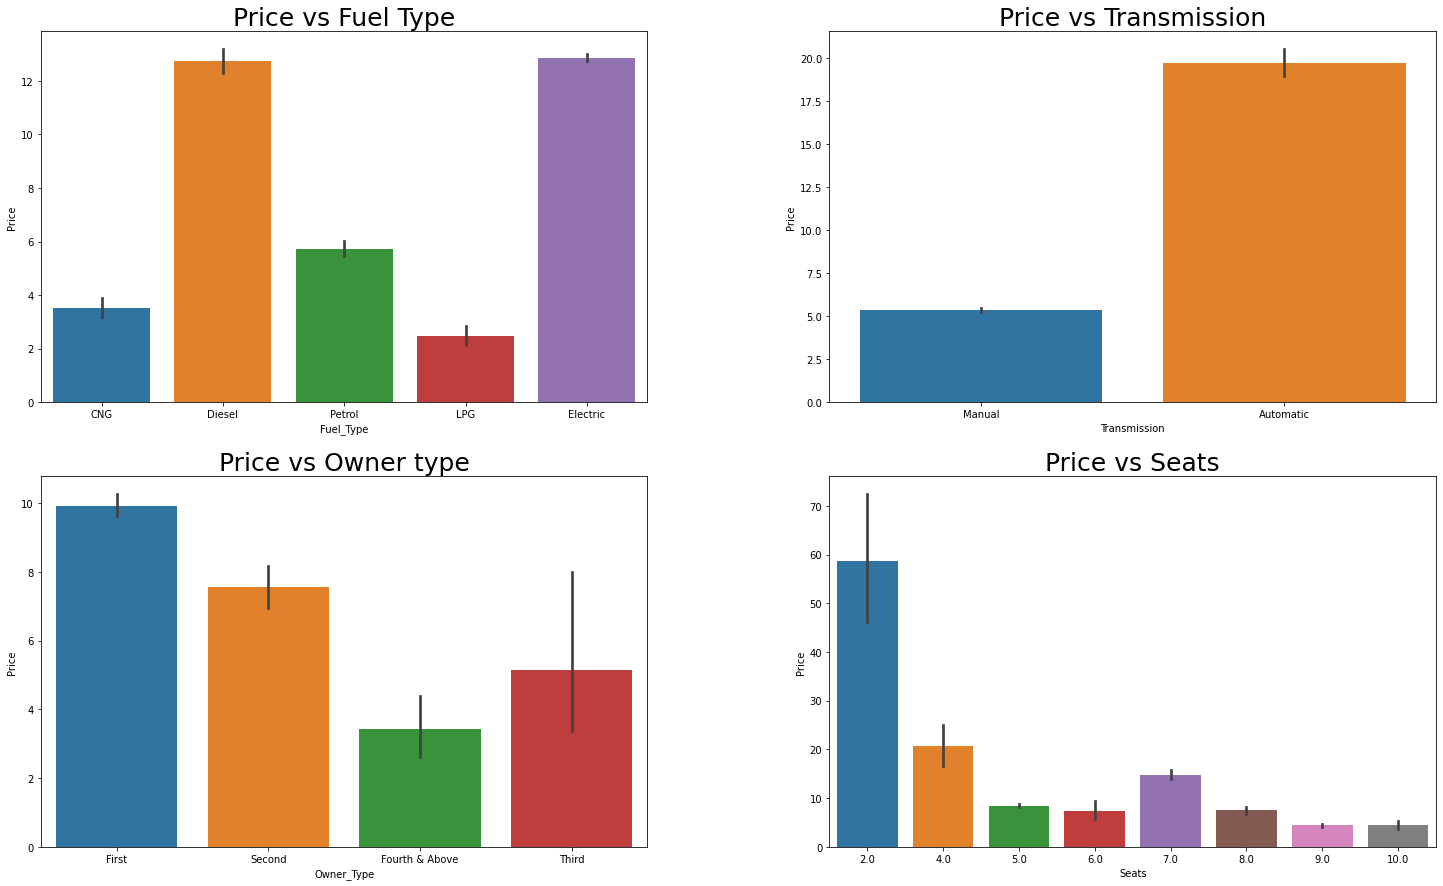

In [21]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)
#Relation between Price and Fuel type
sns.barplot(x = 'Fuel_Type', y = 'Price', data  = DT)
plt.title('Price vs Fuel Type',fontsize  =25)

#Relation between Price and transmission
plt.subplot(2,2,2)
sns.barplot(x ='Transmission', y ='Price', data  = DT)
plt.title('Price vs Transmission',fontsize  =25)

#Relation between price and owner type
plt.subplot(2,2,3)
sns.barplot(x ='Owner_Type', y ='Price', data  = DT)
plt.title('Price vs Owner type',fontsize  =25)

#Relation between price and seats
plt.subplot(2,2,4)
sns.barplot(x ='Seats', y ='Price', data  = DT)
plt.title('Price vs Seats',fontsize  =25)

plt.show()

**INFERENCE :-**

* 1.According to our datasheet price of **Diesel** and **Electric** type of cars is highest below that price is **Petrol** type cars.while **CNG** and **LPG** car type prices are lowest.
* 2.Cleary from graph of Price vs Transimission **Automatic** cars have higher prices than **Manual** type.
* 3.As the number of owner of a car increases the price of that car decreases.
* 4.**Two** seater cars has the Highest prices and as the seats increases in cars the prices decreases.

**NOTE :-** 
Condition for high price car :-
* 1.Should be diesel or electric.
* 2.Automatic in trasmission.
* 3.Should be a New car or atleats a second-hand car.
* 4.Should have Least number of seats.

# **Encoding the categorical coloumns :-** 

## Label Encoding

Creating new DataFrame for Label Encoding.

In [23]:
LE_DT = DT.copy(deep=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
le.fit(np.array(LE_DT['Brand']))
LE_DT['Brand_Le']=pd.Series(le.transform(np.array(LE_DT['Brand'])))

le.fit(np.array(LE_DT['Transmission']))
LE_DT['Transmission_Le']=pd.Series(le.transform(np.array(LE_DT['Transmission'])))

le.fit(np.array(LE_DT['Fuel_Type']))
LE_DT['Fuel_Type_Le']=pd.Series(le.transform(np.array(LE_DT['Fuel_Type'])))

le.fit(np.array(LE_DT['Location']))
LE_DT['Location_Le']=pd.Series(le.transform(np.array(LE_DT['Location'])))

le.fit(np.array(LE_DT['Owner_Type']))
LE_DT['Owner_Type_Le']=pd.Series(le.transform(np.array(LE_DT['Owner_Type'])))

In [26]:
LE_DT.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Brand_Le,Transmission_Le,Fuel_Type_Le,Location_Le,Owner_Type_Le
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,18.0,1.0,0.0,9.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,10.0,1.0,1.0,10.0,0.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,9.0,1.0,4.0,2.0,0.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,18.0,1.0,1.0,2.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,1.0,0.0,1.0,3.0,2.0


## One Hot Encoding

In [120]:
#Encoding the Brand Coloumn
one_hot_brand = pd.get_dummies(DT['Brand'])
DT = DT.drop('Brand',axis = 1)
DT = DT.join(one_hot)

#Encoding the transmission Coloumn
one_hot_trans = pd.get_dummies(DT['Transmission'])
DT = DT.drop('Transmission',axis = 1)
DT = DT.join(one_hot_trans)

#Encoding the owner type Coloumn
one_hot_otype = pd.get_dummies(DT['Owner_Type'])
DT = DT.drop('Owner_Type',axis = 1)
DT = DT.join(one_hot_otype)

#Encoding the Fuel type Coloumn
one_hot_fuel = pd.get_dummies(DT['Fuel_Type'])
DT = DT.drop('Fuel_Type',axis = 1)
DT = DT.join(one_hot_fuel)

DT.head(2)

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ambassador,...,Manual,First,Fourth & Above,Second,Third,CNG,Diesel,Electric,LPG,Petrol
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,0,...,1,1,0,0,0,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,...,1,1,0,0,0,0,1,0,0,0


In [121]:
#Droping name coloumn as it no longer required
DT = DT.drop('Name',axis = 1)
DT.head(2)

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ambassador,Audi,...,Manual,First,Fourth & Above,Second,Third,CNG,Diesel,Electric,LPG,Petrol
0,Mumbai,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,...,1,1,0,0,0,1,0,0,0,0
1,Pune,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,...,1,1,0,0,0,0,1,0,0,0


In [122]:
DT.shape

(5949, 49)

# Data scaling of coloumns :-['Kilometer_Driven','Power','Mileage','Engine']

In [125]:
from sklearn import preprocessing
#import numpy as np
scaler = preprocessing.MinMaxScaler()
DT[['Kilometers_Driven','Engine','Mileage','Power']] = scaler.fit_transform(DT[['Kilometers_Driven','Engine','Mileage','Power']])

In [126]:
DT.head(3)

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ambassador,Audi,...,Manual,First,Fourth & Above,Second,Third,CNG,Diesel,Electric,LPG,Petrol
0,Mumbai,2010,0.092703,0.744289,0.156261,0.045569,5.0,1.75,0,0,...,1,1,0,0,0,1,0,0,0,0
1,Pune,2015,0.052694,0.488946,0.254809,0.174971,5.0,12.50,0,0,...,1,1,0,0,0,0,1,0,0,0
2,Chennai,2011,0.059147,0.434783,0.190179,0.103652,5.0,4.50,0,0,...,1,1,0,0,0,0,0,0,0,1


In [127]:
DT.shape

(5949, 49)

In [ ]:
DT.loc[50]